<hr>

# Import Pacakges

<hr>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<hr>

# Import Data

<hr>

## Diabetic data (main set)

In [2]:
pd.set_option("display.max_columns", None)

diabetic_data = pd.read_csv('diabetic_data.csv')
diabetic_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


## ID dataset (3 of them)

In [3]:
id_data = pd.read_csv('IDs_mapping.csv', header = None)
id_data.head()

,0,1
0,admission_type_id,description
1,1,Emergency
2,2,Urgent
3,3,Elective
4,4,Newborn


In [4]:
# dataset one - admission_type 
empty_rows = id_data[id_data.isna().all(axis=1)].index.tolist()

id_admission_type = id_data.iloc[:empty_rows[0]] 
id_admission_type.columns = id_admission_type.iloc[0] # get the columsn to be first row
id_admission_type = id_admission_type.drop(id_admission_type.index[0]) # remove the first row
id_admission_type = id_admission_type.reset_index(drop=True) # reset index

id_admission_type.head(20)


,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [5]:
# dataset two - discharge id 
id_discharge = id_data.iloc[empty_rows[0]+ 1 : empty_rows[1]]
id_discharge.columns = id_discharge.iloc[0]
id_discharge = id_discharge.drop(id_discharge.index[0])
id_discharge = id_discharge.reset_index(drop = True)

id_discharge.head(31)

10,discharge_disposition_id,description
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...
5,6,Discharged/transferred to home with home healt...
6,7,Left AMA
7,8,Discharged/transferred to home under care of H...
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neo...


In [6]:
# dataset three - admission source id 
id_admission_source = id_data.iloc[empty_rows[1]+1 : ]
id_admission_source.columns = id_admission_source.iloc[0]
id_admission_source = id_admission_source.drop(id_admission_source.index[0])
id_admission_source = id_admission_source.reset_index(drop = True)
id_admission_source.head(26)

42,admission_source_id,description
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Not Available
9,10,Transfer from critial access hospital


<hr>

# Merge Datasets

<hr>

In [7]:
id_admission_type['admission_type_id'] = id_admission_type['admission_type_id'].astype(int)
id_discharge['discharge_disposition_id'] = id_discharge['discharge_disposition_id'].astype(int)
id_admission_source['admission_source_id'] = id_admission_source['admission_source_id'].astype(int)

In [8]:
df = pd.merge(diabetic_data, id_admission_type, how ='inner', on = 'admission_type_id') # description
df = pd.merge(df, id_discharge, how = 'inner', on = 'discharge_disposition_id') # description_x
df = pd.merge(df, id_admission_source, how = 'inner', on= 'admission_source_id') # description_y

In [9]:
df.rename(columns={'description':'admission_desc',
                'description_x':'discharge_desc',
                'description_y':'admission_source_desc'}, inplace = True)

In [10]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,discharge_desc,admission_source_desc,admission_desc
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,NaN,Not Mapped,Physician Referral
1,1968528,720936,Caucasian,Female,[70-80),?,6,25,1,10,?,Surgery-Cardiovascular/Thoracic,56,2,24,0,0,0,440,413,250.52,9,NaN,>7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,NaN,Not Mapped,Physician Referral
2,2223336,558360,AfricanAmerican,Female,[60-70),?,6,25,1,9,?,Orthopedics-Reconstructive,60,5,17,0,0,0,997,8,730,8,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,NaN,Not Mapped,Physician Referral
3,2298006,2519748,Caucasian,Male,[60-70),?,6,25,1,4,?,InternalMedicine,47,0,15,0,0,0,486,250,427,8,NaN,NaN,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO,NaN,Not Mapped,Physician Referral
4,2356308,608841,AfricanAmerican,Female,[50-60),?,6,25,1,1,?,Family/GeneralPractice,50,0,8,0,0,0,250.03,401,276,8,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,NaN,Not Mapped,Physician Referral


# Target Variable Inspection

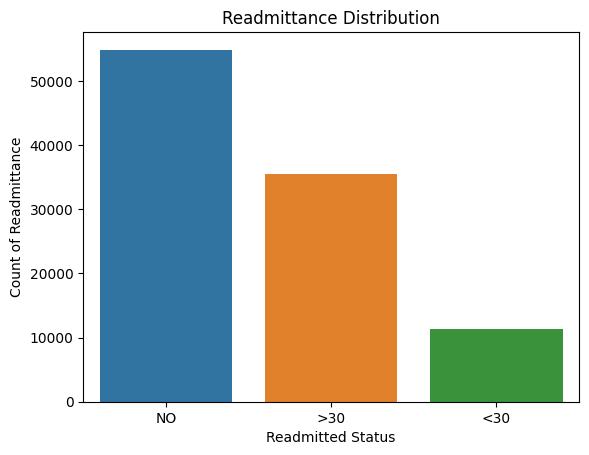

In [11]:
sns.countplot(df, x = 'readmitted')
plt.title('Readmittance Distribution')
plt.xlabel('Readmitted Status')
plt.ylabel('Count of Readmittance')
plt.show()

## Binary Target Variable
- Becuase we are looking to classify readmittance, we will make this a binary type of target instead of multiclass. 
- This will look like "readmitted? = Yes or No"

In [12]:
df['binary_readmitted'] = df['readmitted'].apply(lambda x: 'yes' if x != 'NO' else 'no')

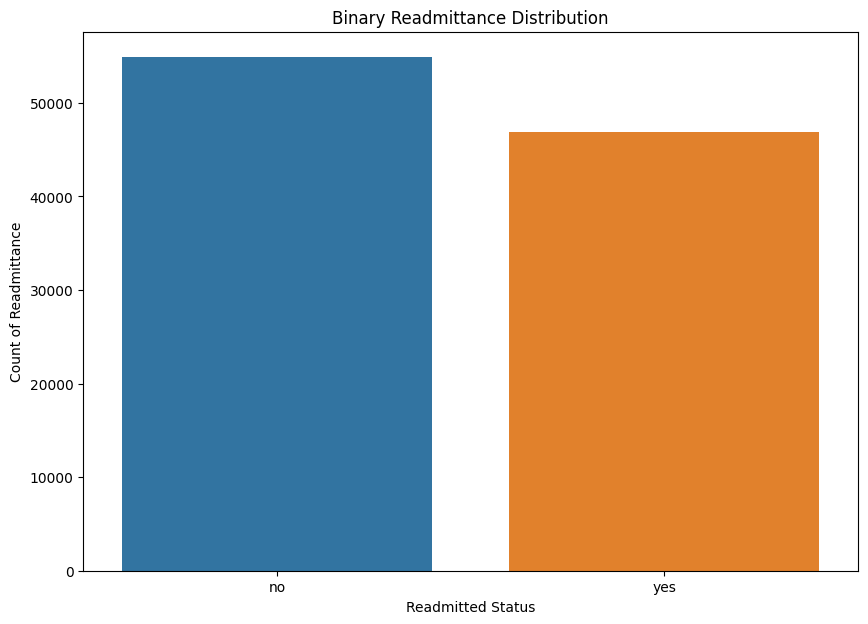

In [13]:
plt.figure(figsize=(10,7))
sns.countplot(df, x = 'binary_readmitted')
plt.title('Binary Readmittance Distribution')
plt.xlabel('Readmitted Status')
plt.ylabel('Count of Readmittance')
plt.show()

<hr>

# Missing Values 

<hr>

## Examining Value Counts

In [14]:
value_counts_dict = {}
for column in df.columns:
    value_counts_dict[column] = df[column].value_counts()

for column, i in value_counts_dict.items():
    print(f'Column: {column}')
    print(i)
    print('\n')

Column: encounter_id
encounter_id
2278392      1
217273374    1
217188990    1
217165278    1
217146714    1
            ..
48648786     1
48582588     1
48525978     1
48513912     1
370756376    1
Name: count, Length: 101766, dtype: int64


Column: patient_nbr
patient_nbr
88785891     40
43140906     28
1660293      23
23199021     23
88227540     23
             ..
112244895     1
5899338       1
108997866     1
3452139       1
87775947      1
Name: count, Length: 71518, dtype: int64


Column: race
race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64


Column: gender
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64


Column: age
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10) 

## Features that may be redundant or contain redundant values
- citoglipton - single value
- examide - single value 
- Gender - remove the unknown gender
- metformin-pioglitazone - binary
- metformin-rosiglitazone - binary
- glimepiride-pioglitazone - binary 
- glipizide-metformin - binary
- tolazamide - binary
- troglitazone - binary 
- tolbutamide - binary
- acetohexamide - binary



In [15]:
df = df[df['gender']!='Unknown/Invalid'] # taking out the 'unknown/invalid' gender observations

# dropping observations where the values were insignificant
df.drop(['citoglipton','examide','metformin-pioglitazone',
        'metformin-rosiglitazone','glimepiride-pioglitazone',
        'glipizide-metformin','tolazamide','troglitazone',
        'tolbutamide','acetohexamide', 'readmitted'], axis = 1, inplace = True)

In [16]:
# some patients have been back multiple times. We are trying to determine readmittance, so we will focus on 
# when patients have come back by keeping the first return visit rather than every single visit. 
df = df.drop_duplicates(subset = 'patient_nbr', keep = 'first')

print(df.shape) # looking at how the shape has been reduced thus far

(71515, 43)


## Hidden N/A Values
- **race:** contain ?
    - Upon further investigation (visually and with cross tabulations) we have determined this data to be MCAR (Missing Completely at Random)
    - We will proceed with imputation of the most frequent category <br><br>
- **weight:** > 90% missing values 
    - Upon further investigation (visually and with cross tabulations) we have determined this data to be MCAR (Missing Completely at Random)
    - We will proceed with the removal of this feature.<br><br>
- **payer_code:** contain ?
    - Upon Futher Investigation (visually and with cross tabulations) we have determined that this data is MCAR. 
    - We will not impute these values, or remove them as there is a significant amount missing, instead we will re-label the missing values and include them as 
    a feature in our data.<br><br>
- **medical_specialty:** contain ?
    - There is seemingly no relationship between the values in our data and the missingness of our medical specialty values.
    - We will proceed with imputing the missing values as their own value of "other". <br><br>
- **diag-1,2,3:** all contain '?'
    - There is an inconsequential amount of missing data in the Diagnosis 1,2,3. We will proceed with removing the null values. 

In [17]:
# we are replacing '?' with NaN so that we can visually see where the missing data is happening
df['race'].replace('?', np.nan, inplace = True)
df['weight'].replace('?', np.nan, inplace =True)
df['payer_code'].replace('?', np.nan, inplace = True)
df['medical_specialty'].replace('?', np.nan, inplace = True)
df['diag_1'].replace('?', np.nan, inplace = True)
df['diag_2'].replace('?', np.nan, inplace = True)
df['diag_3'].replace('?', np.nan, inplace = True)

## Heatmap for Missing Values

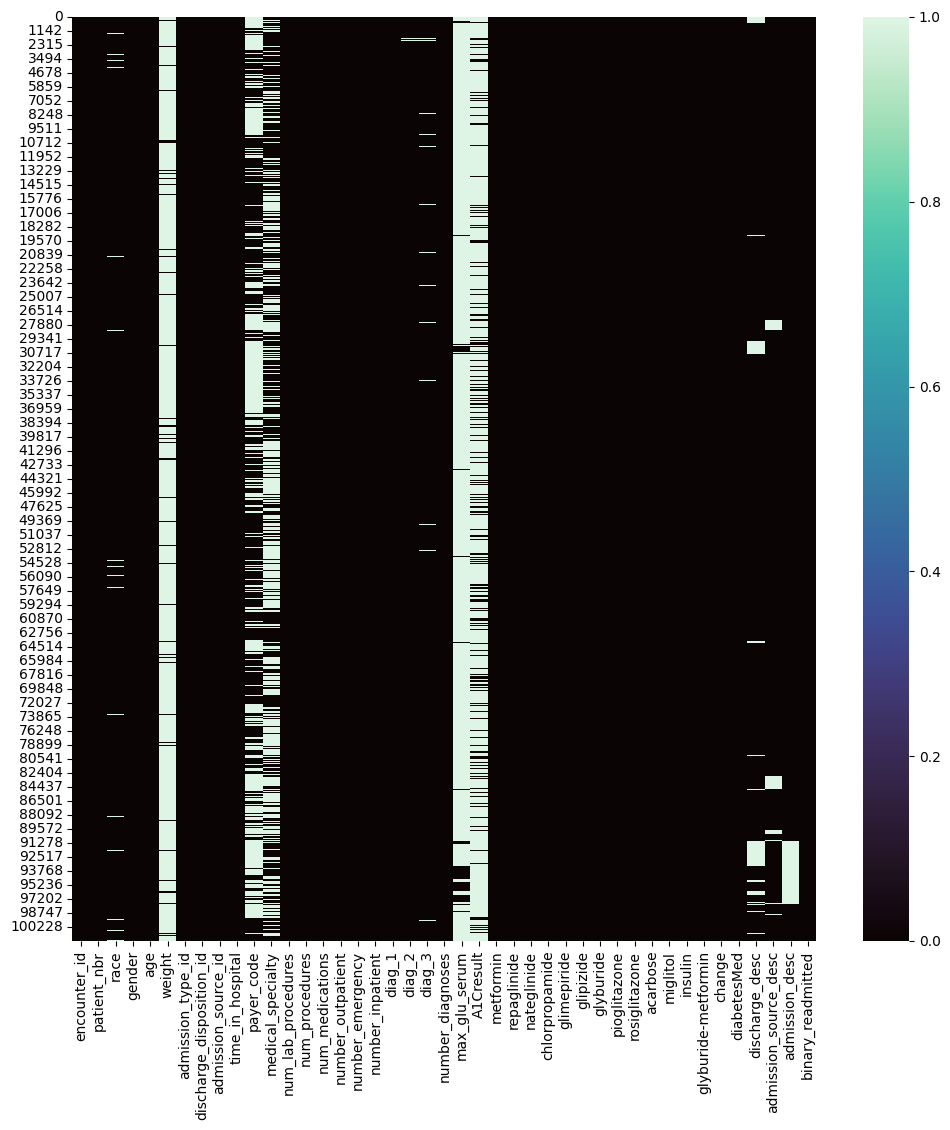

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(df.isnull(), cbar = True, cmap = 'mako')
plt.show()

## Discharge Desc. & Admission Desc. 
- The heatmap and cross tabulations show that there is some relationship between the missing values in Discharge Desc. & Admission Desc.
- This relationship somewhats makes sense intuitively becuase if there is missing information regarding Admission, it would make sense that Discharge missing information could be related. 
- Ultimately this relationship is only a partial correlation and isn't quite considered MNAR (missing not at random). We will proceed with filling the NaN values for these as "other". 

In [19]:
cont_table = pd.crosstab(df['discharge_desc'].isna(), df['admission_desc'].isna())
cont_table

admission_desc,False,True
discharge_desc,,
False,64622,2307
True,2004,2582


In [20]:
df[(df['discharge_desc'] == 'NAN') & (df['admission_type_id'] == 6)]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,insulin,glyburide-metformin,change,diabetesMed,discharge_desc,admission_source_desc,admission_desc,binary_readmitted


## Payer Code Vs Medical Specialty
- Looking at the heatmap above it appears that there are some instances where payer code and medical specialty flip between missing observations. 
- to further explore if maybe the missingness can be determined by the missingness of the other we will create a contingency table. 

In [21]:
cont_table = pd.crosstab(df['payer_code'].isnull(), df['medical_specialty'].isnull())
cont_table

medical_specialty,False,True
payer_code,,
False,19288,21474
True,18202,12551


From this table, we can observe that when 'payer_code' is not missing (False), 'medical_specialty' can be either not missing (False) or missing (True). Similarly, when 'payer_code' is missing (True), 'medical_specialty' can also be either not missing (False) or missing (True).

There doesn't seem to be a strong relationship indicating that when one feature is missing, the other is not missing, or vice versa. In other words, the missingness of 'payer_code' and 'medical_specialty' does not appear to be dependent on each other.

## Define Percent Missing

In [22]:
def percent_missing(df):
    percent_nan = 100*df.isnull().sum()/len(df) 
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return(percent_nan)
percent_nan = percent_missing(df)
print(round(percent_nan,2))

diag_1                    0.02
diag_2                    0.41
diag_3                    1.68
race                      2.67
admission_source_desc     3.22
discharge_desc            6.41
admission_desc            6.84
payer_code               43.00
medical_specialty        47.58
A1Cresult                82.20
max_glu_serum            95.15
weight                   96.02
dtype: float64


## Percent Missing Bar Plot

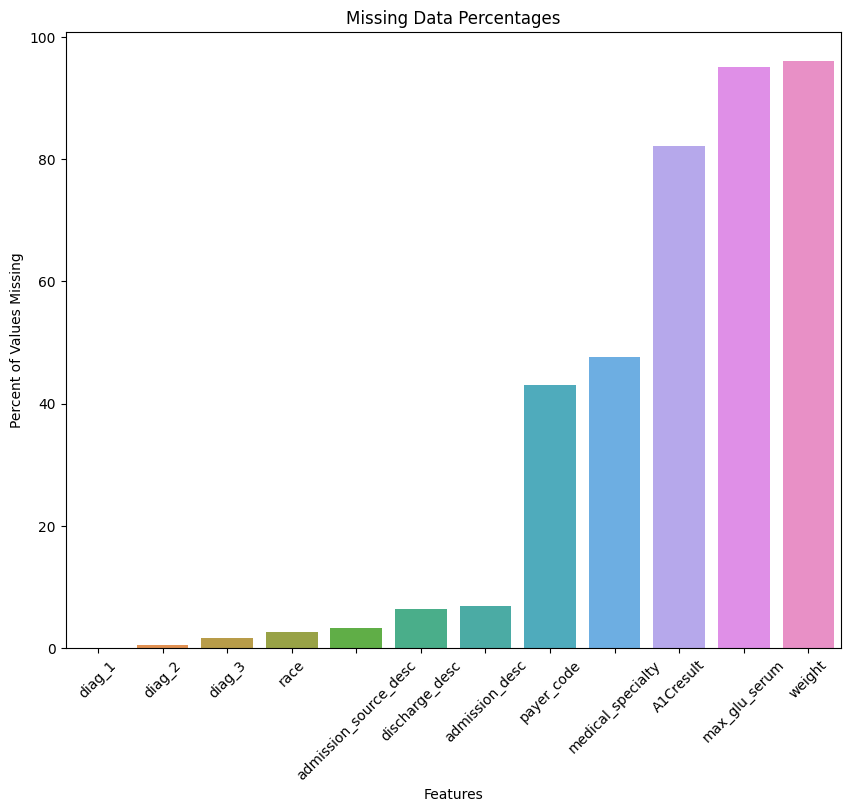

In [23]:
plt.figure(figsize = (10,8))
sns.barplot(x= percent_nan.index, y = percent_nan)
plt.title('Missing Data Percentages')
plt.xlabel('Features')
plt.ylabel('Percent of Values Missing')
plt.xticks(rotation = 45)
plt.show()

In [24]:
# filling NaN with "NAN" so that we can see in our data where these values are occuring.
# this gives us a means of representing the missing data which is useful in investigation before we proceed with any changes

#impute race missing values with mode
mode_race = df['race'].mode()[0]
df['race'].fillna(mode_race, inplace = True)

# drop the weight column
df.drop('weight', inplace = True, axis = 1)

# payer_code impute with it's own level to maintain information in data. 
df['payer_code'].fillna('Not Specified', inplace = True)


df['medical_specialty'].fillna('Other', inplace = True)

# fill NaN with 'other'
df['admission_desc'].fillna('Other', inplace = True)
df['admission_source_desc'].fillna('Other', inplace = True)
df['discharge_desc'].fillna('Other', inplace = True)

# remove NaN from Diag 1-3
df.dropna(subset=['diag_1','diag_2','diag_3'], inplace = True)

## Medical Specialty - With use of "other" value to represent the NaN

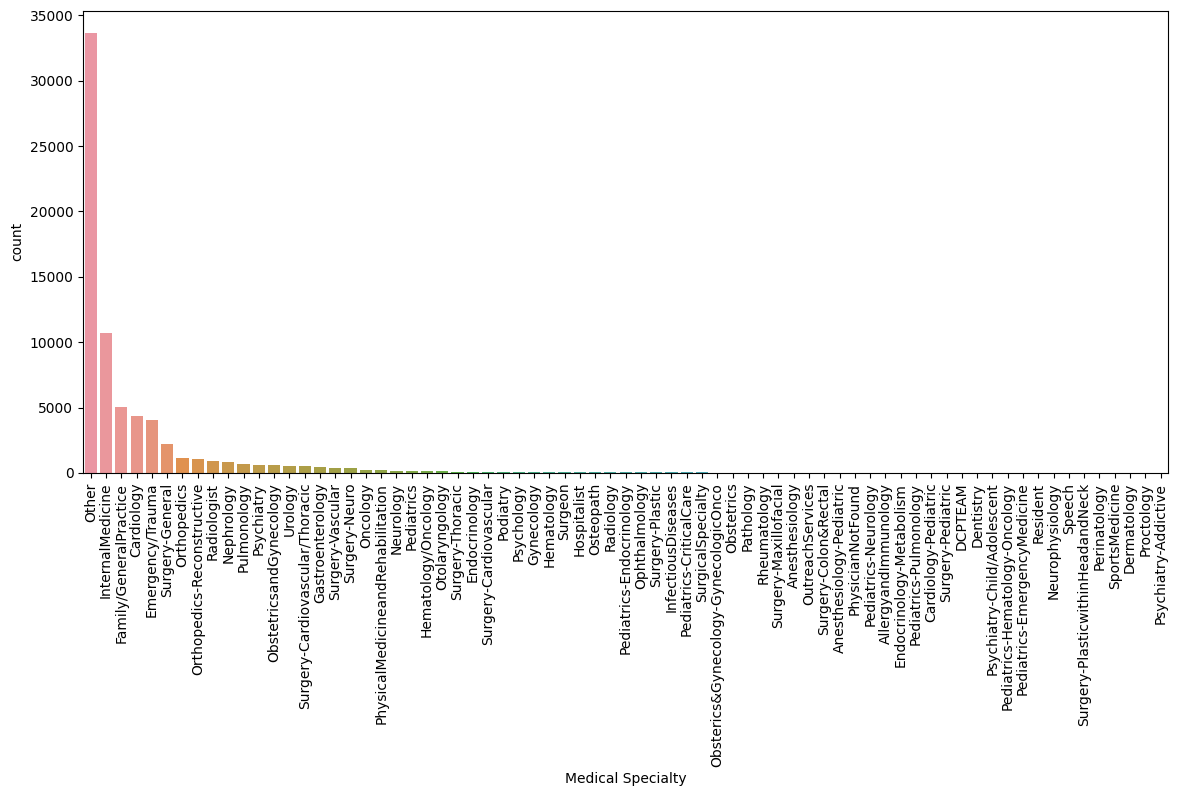

In [25]:
plt.figure(figsize=(14,6))
sns.countplot(df, x = 'medical_specialty', order = df['medical_specialty'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel('Medical Specialty')
plt.show()

## Race - With imputed Mode

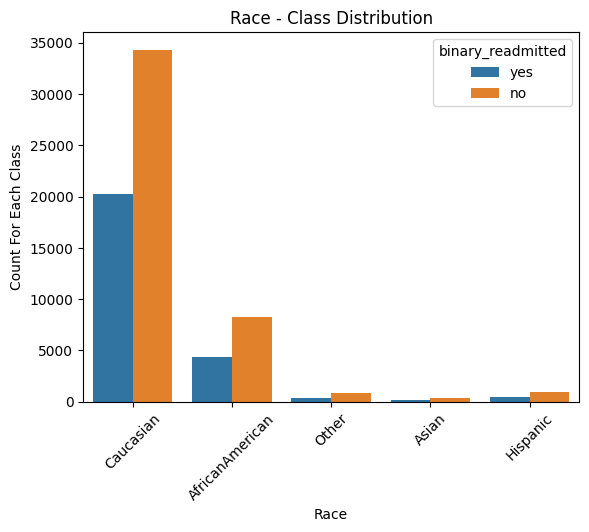

In [26]:
sns.countplot(df, x = 'race', hue = 'binary_readmitted')
plt.xticks(rotation = 45)
plt.title('Race - Class Distribution')
plt.xlabel('Race')
plt.ylabel('Count For Each Class')
plt.show()

## Payer Code - Relabeld NaN as Not Specified

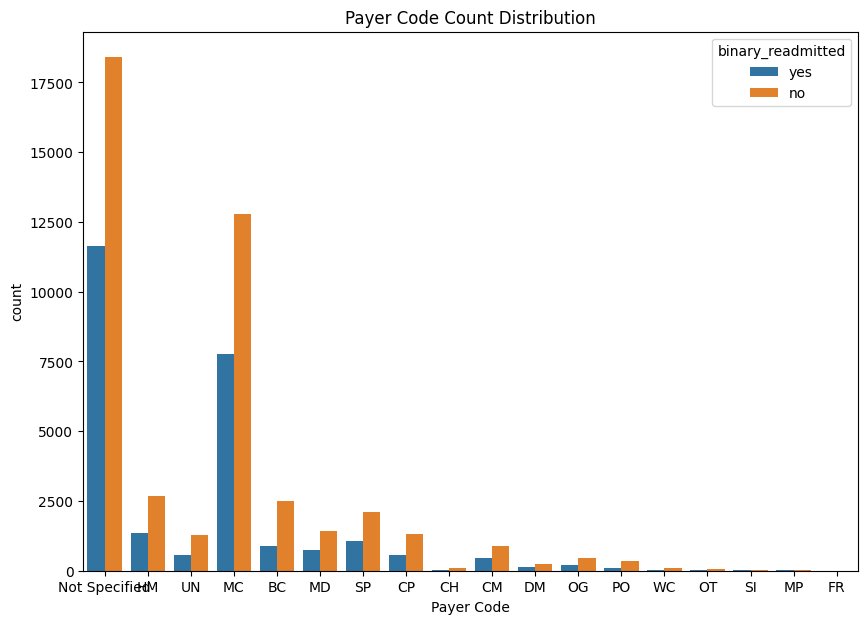

In [27]:
plt.figure(figsize=(10,7))
sns.countplot(df, x = 'payer_code', hue='binary_readmitted')
plt.title('Payer Code Count Distribution')
plt.xlabel('Payer Code')
plt.show()

<hr>

# Click Here For information on [Diagnosis Codes](https://www.icd10data.com/)

<hr>

In [28]:
# diag 1 
custom_categories = {
    'Diabetes': ['250', '250.02', '250.03', '250.04', '250.1', '250.11', '250.12', '250.13', '250.2', '250.21', '250.22', '250.3', '250.31', '250.32', '250.33', '250.4', '250.41', '250.42', '250.43', '250.5', '250.51', '250.52', '250.53', '250.6', '250.7', '250.8', '250.81', '250.82', '250.83', '250.9', '250.91', '250.92', '250.93'],
    'Heart Disease': ['410', '411', '412', '413', '414', '415', '416', '417', '418', '419', '420', '421', '422', '423', '424', '425', '426', '427', '428', '429', '430', '431', '432', '433', '434', '435', '436', '437', '438', '439'],
    'Respiratory': ['460', '461', '462', '463', '464', '465', '466', '470', '471', '472', '473', '474', '475', '476', '477', '478', '480', '481', '482', '483', '484', '485', '486', '487', '488', '491', '492', '493', '494', '495', '496', '497', '498', '499'],
    'Injury': ['800', '801', '802', '803', '804', '805', '806', '807', '808', '809', '810', '811', '812', '813', '814', '815', '816', '817', '818', '819', '820', '821', '822', '823', '824', '825', '826', '827', '828', '829', '830', '831', '832', '833', '834', '835', '836', '837', '838', '839', '840', '841', '842', '843', '844', '845', '846', '847', '848', '849', '850', '851', '852', '853', '854', '855', '856', '857', '858', '859', '860', '861', '862', '863', '864', '865', '866', '867', '868', '869', '870', '871', '872', '873', '874', '875', '876', '877', '878', '879', '880', '881', '882', '883', '884', '885', '886', '887', '888', '889', '890', '891', '892', '893', '894', '895', '896', '897', '898', '899', '900', '901', '902', '903', '904', '905', '906', '907', '908', '909', '910', '911', '912', '913', '914', '915', '916', '917', '918', '919', '920', '921', '922', '923', '924', '925', '926', '927', '928', '929', '930', '931', '932', '933', '934', '935', '936', '937', '938', '939', '940', '941', '942', '943', '944', '945', '946', '947', '948', '949', '950', '951', '952', '953', '954', '955', '956', '957', '958', '959', '960', '961', '962', '963', '964', '965', '966', '967', '968', '969', '970', '971', '972', '973', '974', '975', '976', '977', '978', '979', '980', '981', '982', '983', '984', '985', '986', '987', '988', '989', '990', '991', '992', '993', '994', '995', '996', '997', '998', '999'],
    'Other': ['E909', 'V25', 'V26', 'V43', 'V45', 'V51', 'V53', 'V54', 'V55', 'V56', 'V58', 'V60', 'V63', 'V66', 'V67', 'V70', 'V71']
}

# Create a new column 'diag_1_new' and set it to 'Other' initially
df['diag_1_new'] = 'Other'

# Map the values in 'diag_1' to custom categories
for category, codes in custom_categories.items():
    df.loc[df['diag_1'].isin(codes), 'diag_1_new'] = category

# Display the DataFrame with the new 'diag_1_new' feature
print(df[['diag_1', 'diag_1_new']])

        diag_1     diag_1_new
1          440          Other
2          997         Injury
3          486    Respiratory
4       250.03       Diabetes
5          414  Heart Disease
...        ...            ...
101752     998         Injury
101753     996         Injury
101754     V57          Other
101755     V57          Other
101762     V57          Other

[70256 rows x 2 columns]


In [29]:
# diag 2
custom_categories_diag_2 = {
    'Diabetes': ['250', '250.02', '250.03', '250.04', '250.1', '250.11', '250.12', '250.13', '250.2', '250.21', '250.22', '250.3', '250.31', '250.32', '250.33', '250.4', '250.41', '250.42', '250.43', '250.5', '250.51', '250.52', '250.53', '250.6', '250.7', '250.8', '250.81', '250.82', '250.83', '250.9', '250.91', '250.92', '250.93'],
    'Heart Disease': ['410', '411', '412', '413', '414', '415', '416', '417', '418', '419', '420', '421', '422', '423', '424', '425', '426', '427', '428', '429', '430', '431', '432', '433', '434', '435', '436', '437', '438', '439'],
    'Respiratory': ['460', '461', '462', '463', '464', '465', '466', '470', '471', '472', '473', '474', '475', '476', '477', '478', '480', '481', '482', '483', '484', '485', '486', '487', '488', '491', '492', '493', '494', '495', '496', '497', '498', '499'],
    'Injury': ['800', '801', '802', '803', '804', '805', '806', '807', '808', '809', '810', '811', '812', '813', '814', '815', '816', '817', '818', '819', '820', '821', '822', '823', '824', '825', '826', '827', '828', '829', '830', '831', '832', '833', '834', '835', '836', '837', '838', '839', '840', '841', '842', '843', '844', '845', '846', '847', '848', '849'],
    'Other': ['?', 'V', 'E']
}

# Create a new column 'diag_2_new' and set it to 'Other' initially
df['diag_2_new'] = 'Other'

# Map the values in 'diag_2' to custom categories
for category, codes in custom_categories_diag_2.items():
    df.loc[df['diag_2'].isin(codes), 'diag_2_new'] = category

# Display the DataFrame with the new 'diag_2_new' feature
print(df[['diag_2', 'diag_2_new']])

       diag_2     diag_2_new
1         413  Heart Disease
2           8          Other
3         250       Diabetes
4         401          Other
5         340          Other
...       ...            ...
101752    786          Other
101753   E878          Other
101754    788          Other
101755    348          Other
101762    599          Other

[70256 rows x 2 columns]


In [30]:
# diag 3
custom_categories_diag_3 = {
    'Diabetes': ['250', '250.02', '250.03', '250.04', '250.1', '250.11', '250.12', '250.13', '250.2', '250.21', '250.22', '250.3', '250.31', '250.32', '250.33', '250.4', '250.41', '250.42', '250.43', '250.5', '250.51', '250.52', '250.53', '250.6', '250.7', '250.8', '250.81', '250.82', '250.83', '250.9', '250.91', '250.92', '250.93'],
    'Heart Disease': ['410', '411', '412', '413', '414', '415', '416', '417', '418', '419', '420', '421', '422', '423', '424', '425', '426', '427', '428', '429', '430', '431', '432', '433', '434', '435', '436', '437', '438', '439'],
    'Respiratory': ['460', '461', '462', '463', '464', '465', '466', '470', '471', '472', '473', '474', '475', '476', '477', '478', '480', '481', '482', '483', '484', '485', '486', '487', '488', '491', '492', '493', '494', '495', '496', '497', '498', '499'],
    'Injury': ['800', '801', '802', '803', '804', '805', '806', '807', '808', '809', '810', '811', '812', '813', '814', '815', '816', '817', '818', '819', '820', '821', '822', '823', '824', '825', '826', '827', '828', '829', '830', '831', '832', '833', '834', '835', '836', '837', '838', '839', '840', '841', '842', '843', '844', '845', '846', '847', '848', '849'],
    'Other': ['NAN', 'E888', 'E878', 'V', 'V43', 'V70']
}

# Create a new column 'diag_3_new' and set it to 'Other' initially
df['diag_3_new'] = 'Other'

# Map the values in 'diag_3' to custom categories
for category, codes in custom_categories_diag_3.items():
    df.loc[df['diag_3'].isin(codes), 'diag_3_new'] = category

# Display the DataFrame with the new 'diag_3_new' feature
print(df[['diag_3', 'diag_3_new']])

        diag_3     diag_3_new
1       250.52       Diabetes
2          730          Other
3          427  Heart Disease
4          276          Other
5          401          Other
...        ...            ...
101752     584          Other
101753     401          Other
101754     349          Other
101755     V58          Other
101762     V43          Other

[70256 rows x 2 columns]


## Drop Columns no longer needed, or which pose redundant information

In [31]:
df.drop(['encounter_id','patient_nbr','admission_type_id','discharge_disposition_id',
        'admission_source_id','diag_1','diag_2','diag_3'], inplace = True, axis = 1)

# Cross Tabulation Loop

In [32]:
column_features = ['race', 'gender', 'age', 'time_in_hospital', 'payer_code',
    'medical_specialty', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'insulin',
    'glyburide-metformin', 'change', 'diabetesMed', 'discharge_desc',
    'admission_source_desc', 'admission_desc', 'binary_readmitted',
    'diag_1_new', 'diag_2_new', 'diag_3_new']

for feature in column_features:
    cross_tab = pd.crosstab(df['race'], df[feature])
    print(f"Cross-tabulation for race and {feature}:")
    print(cross_tab)
    print("\n")

Cross-tabulation for race and race:
race             AfricanAmerican  Asian  Caucasian  Hispanic  Other
race                                                               
AfricanAmerican            12625      0          0         0      0
Asian                          0    489          0         0      0
Caucasian                      0      0      54520         0      0
Hispanic                       0      0          0      1467      0
Other                          0      0          0         0   1155


Cross-tabulation for race and gender:
gender           Female   Male
race                          
AfricanAmerican    7685   4940
Asian               245    244
Caucasian         28086  26434
Hispanic            792    675
Other               583    572


Cross-tabulation for race and age:
age              [0-10)  [10-20)  [20-30)  [30-40)  [40-50)  [50-60)  [60-70)  \
race                                                                            
AfricanAmerican       5      104

## More Counplots for Categorical Variables

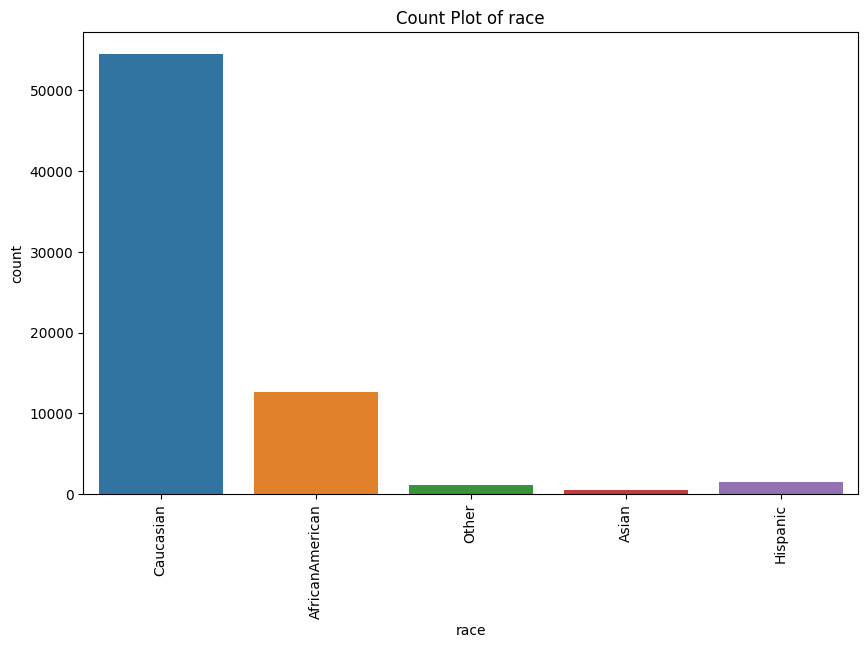

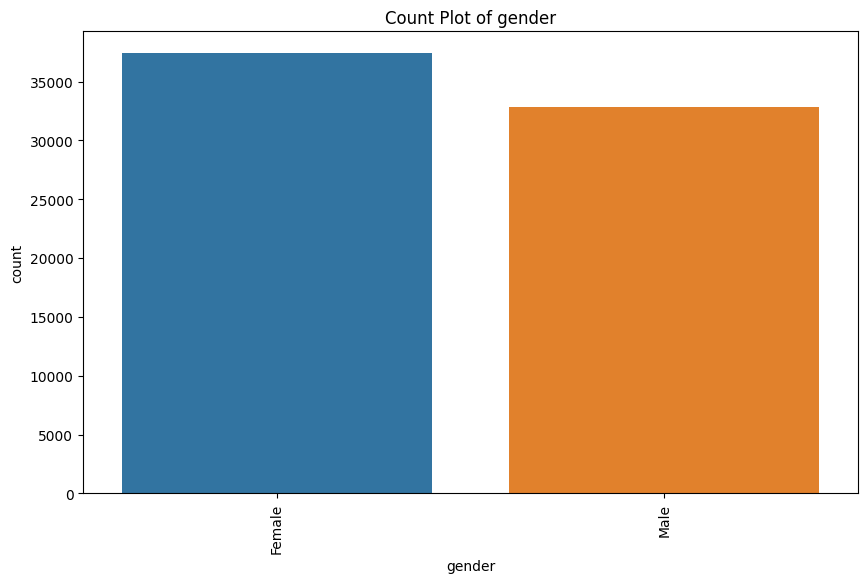

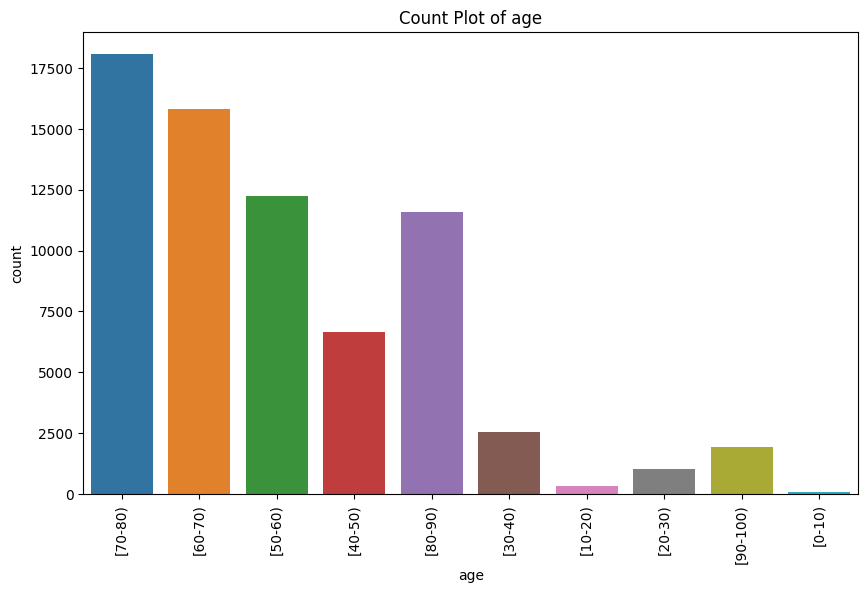

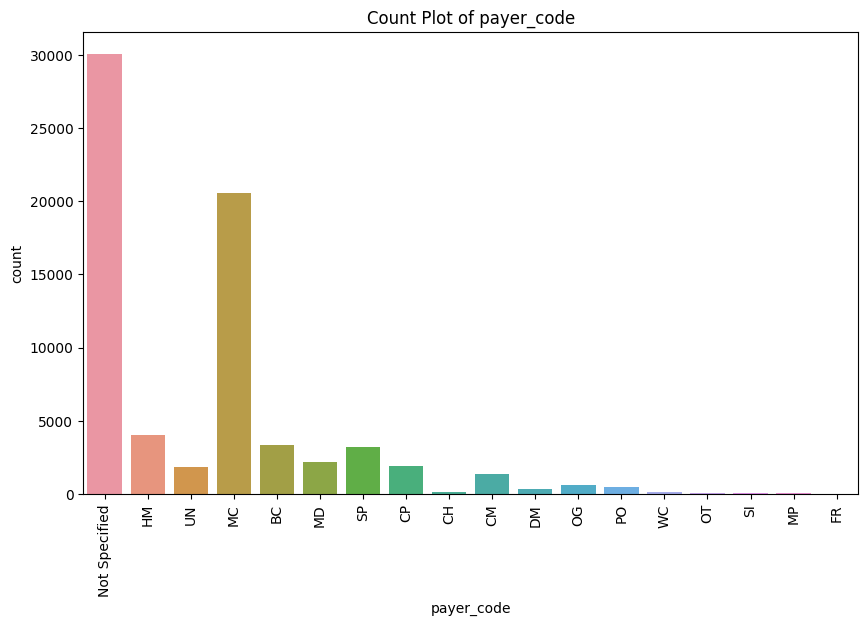

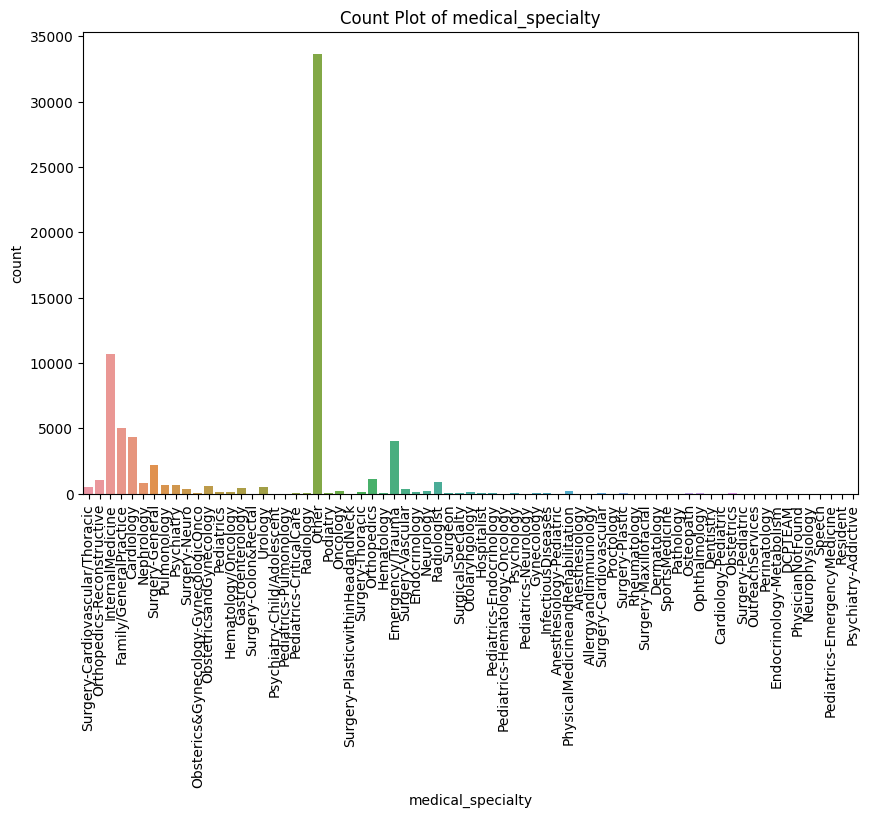

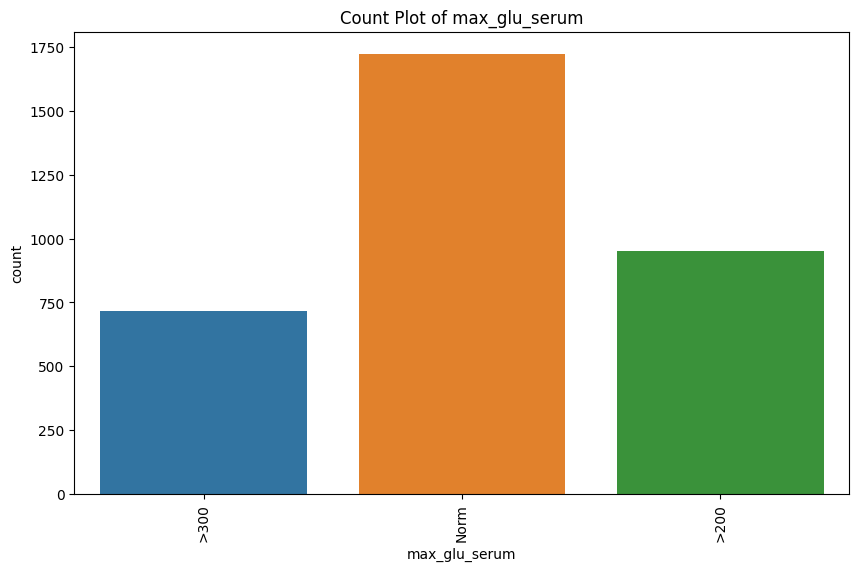

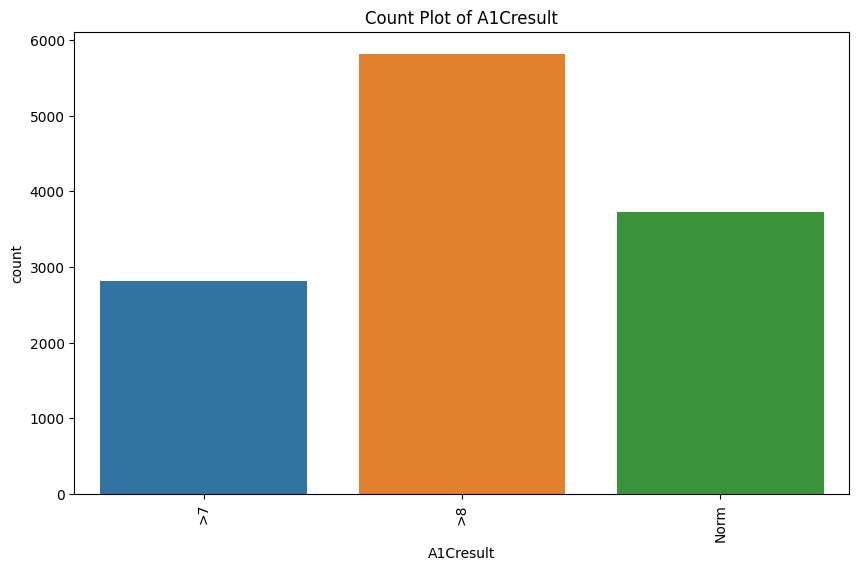

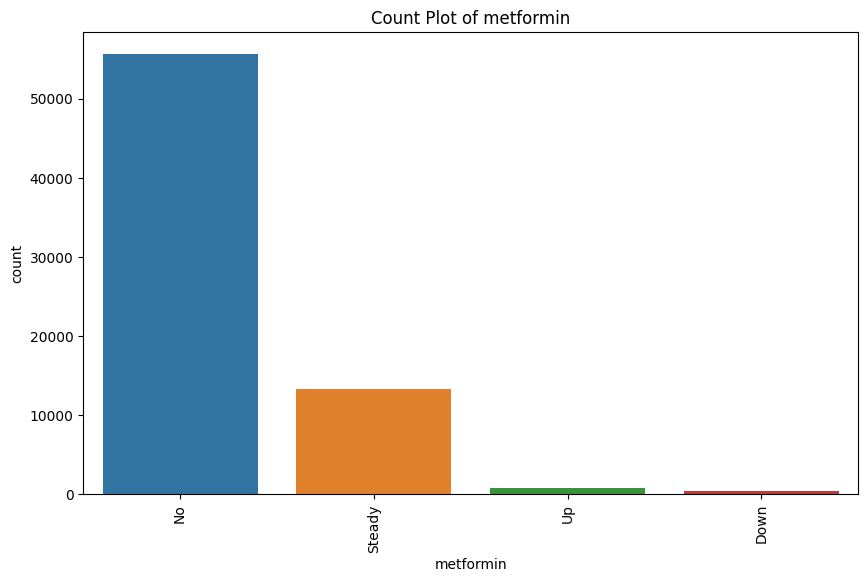

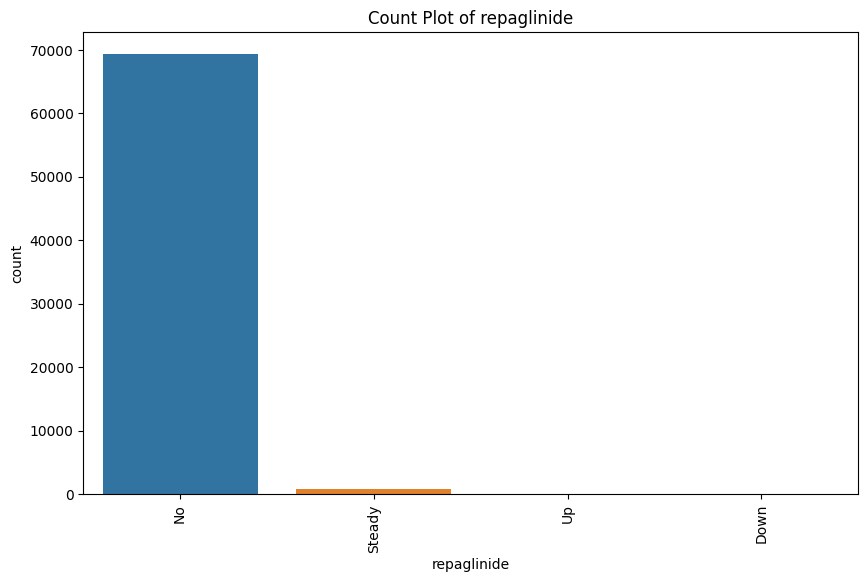

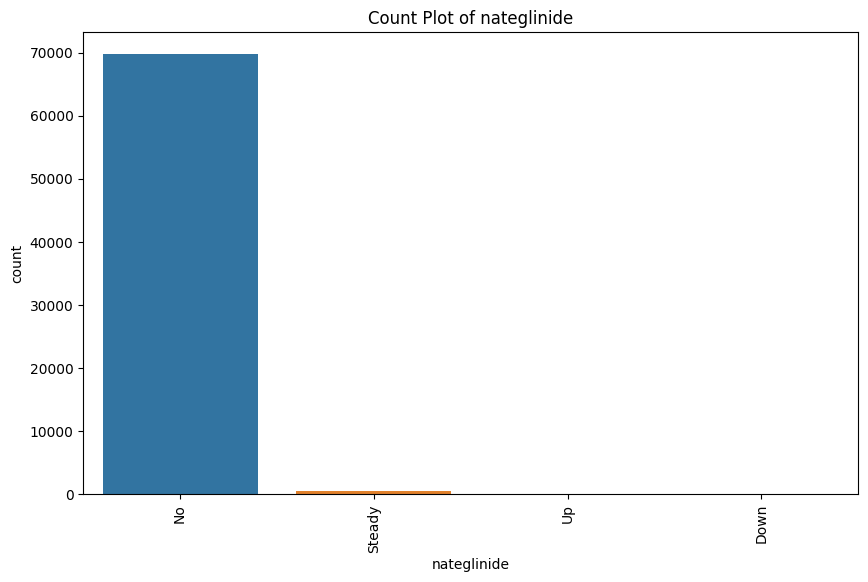

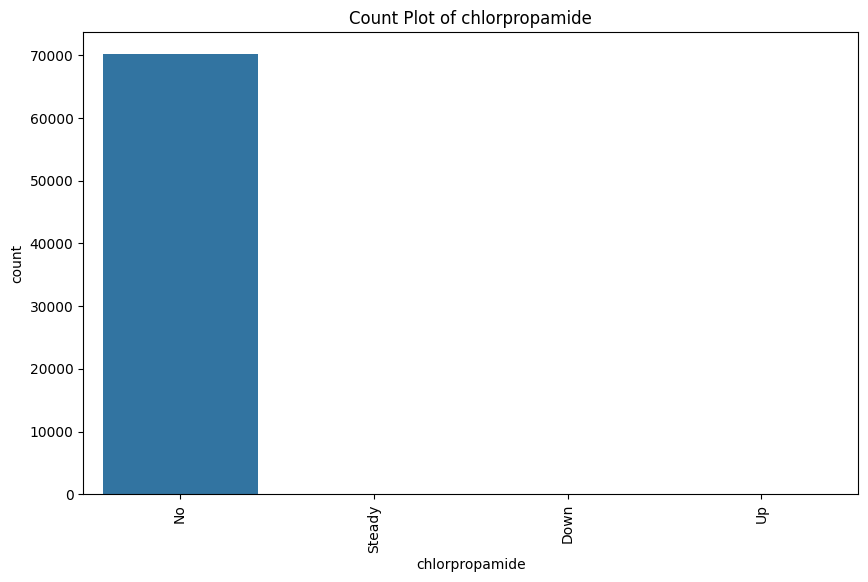

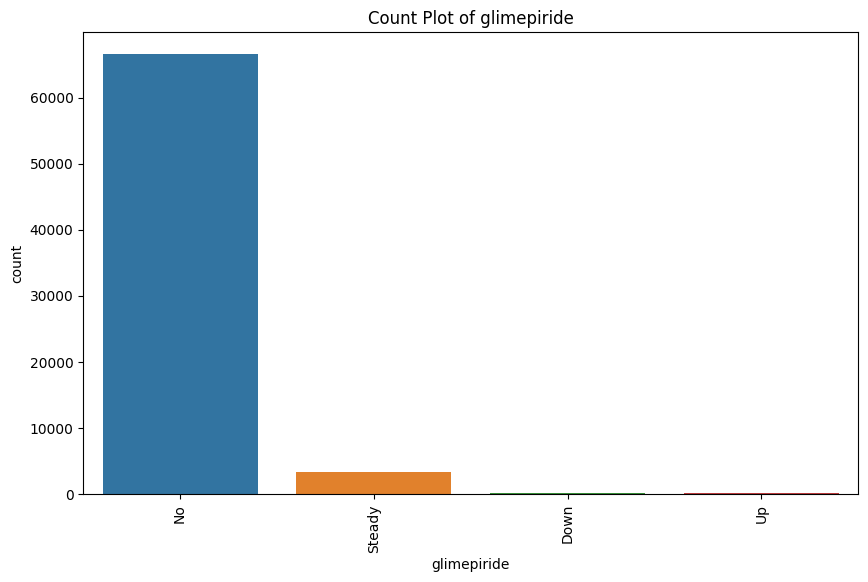

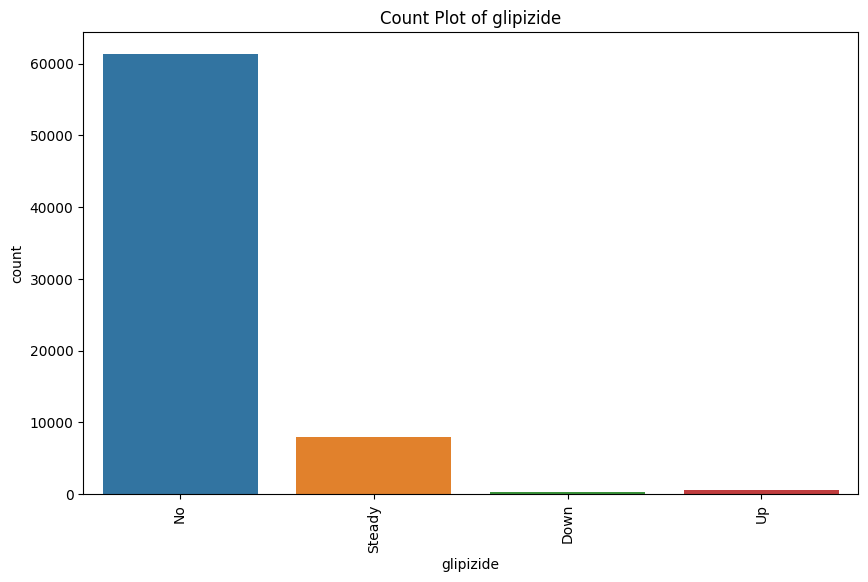

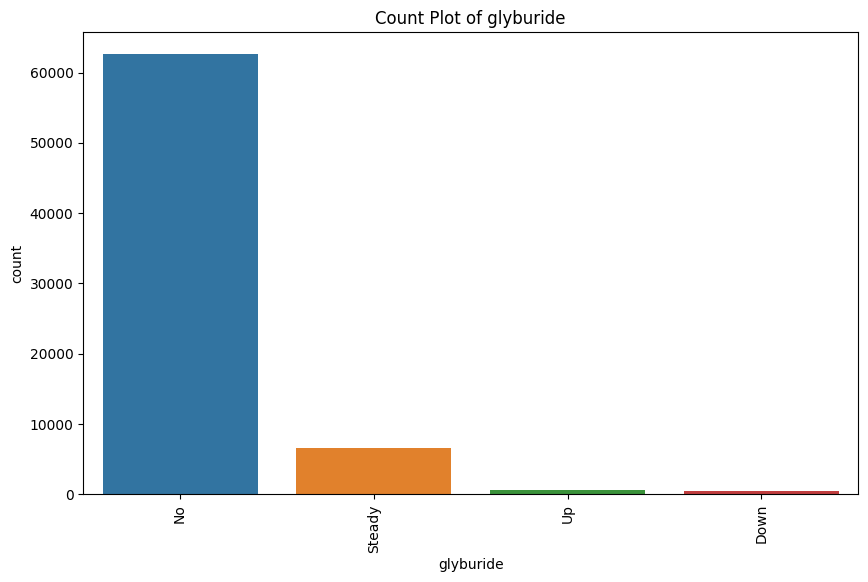

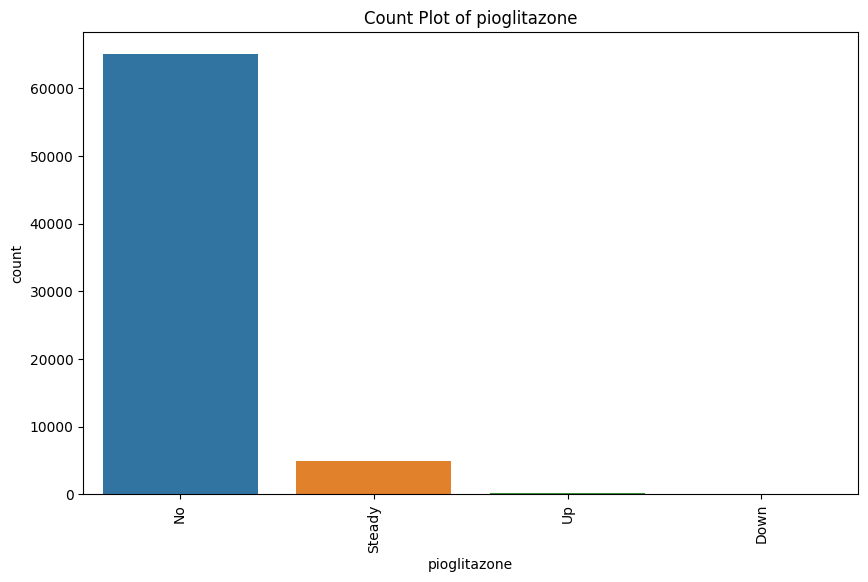

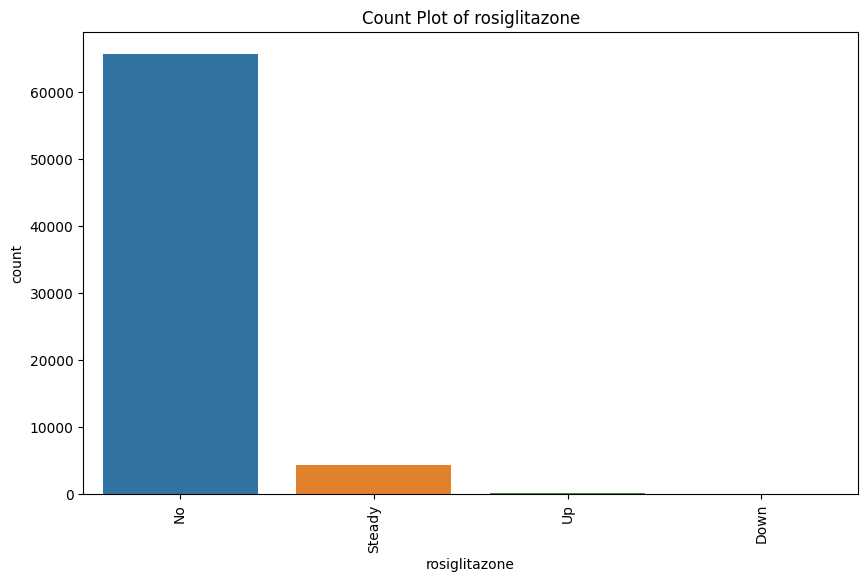

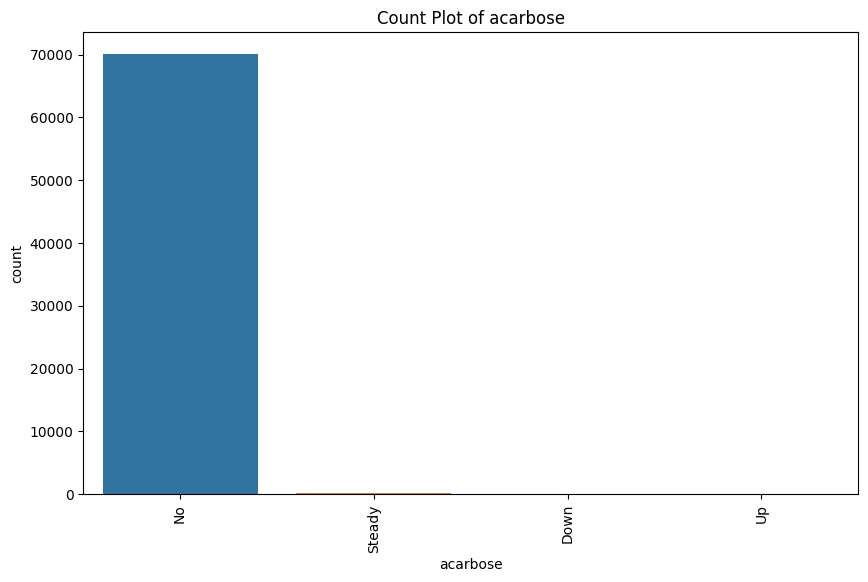

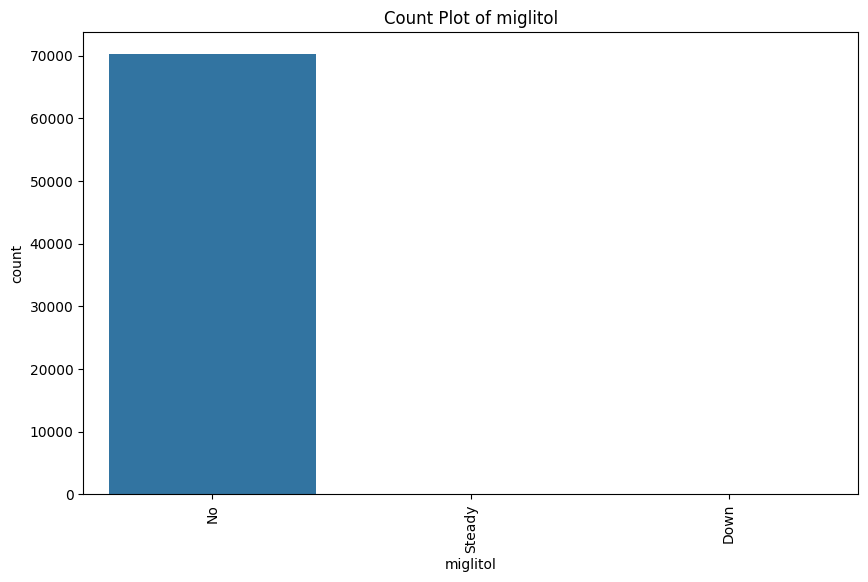

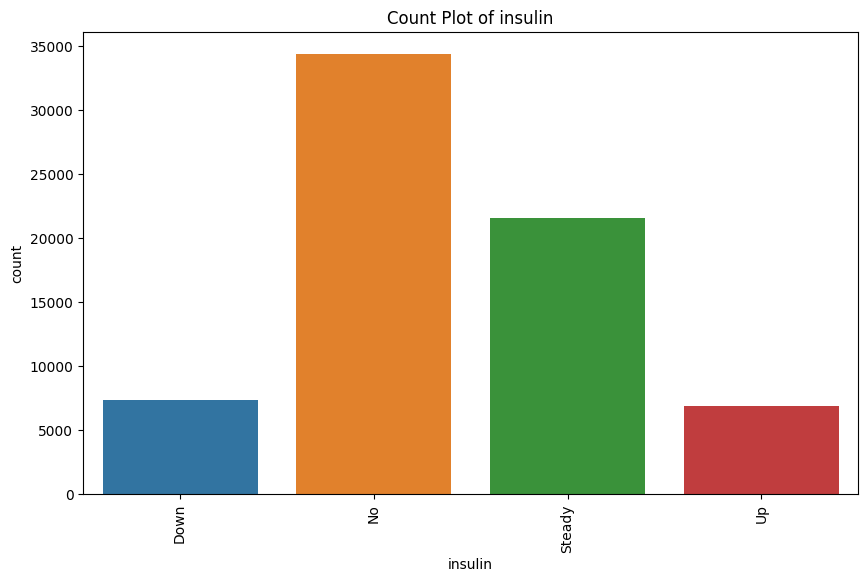

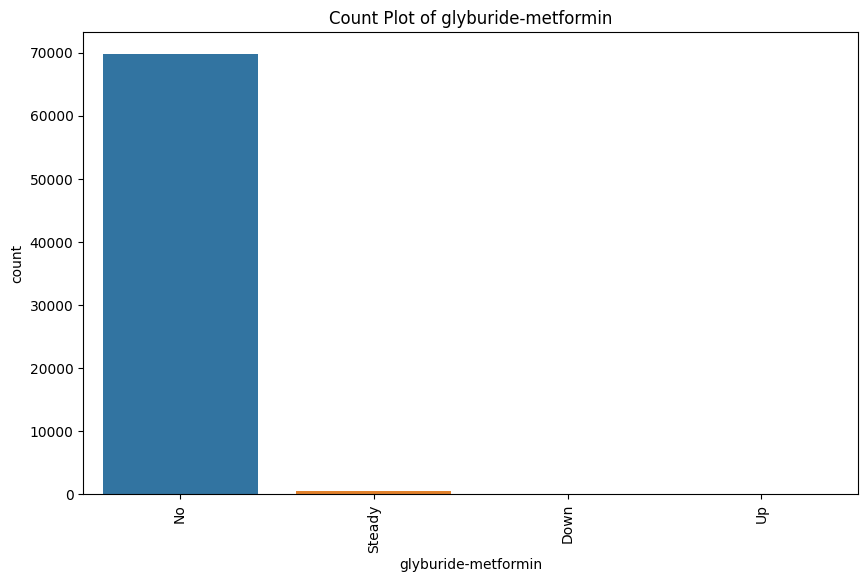

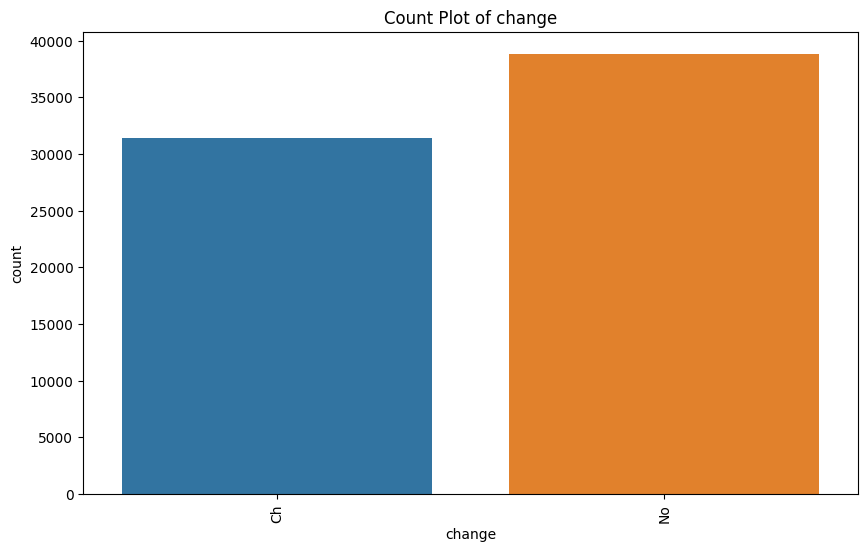

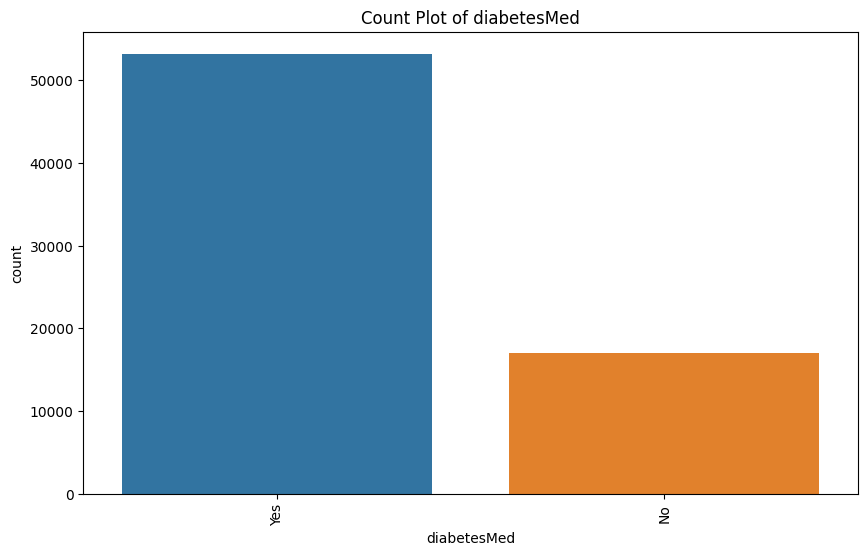

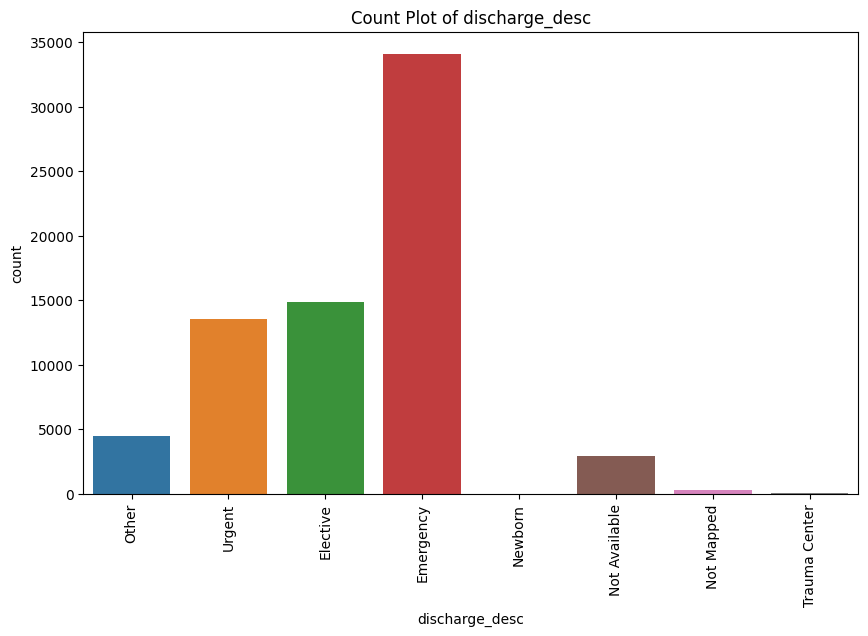

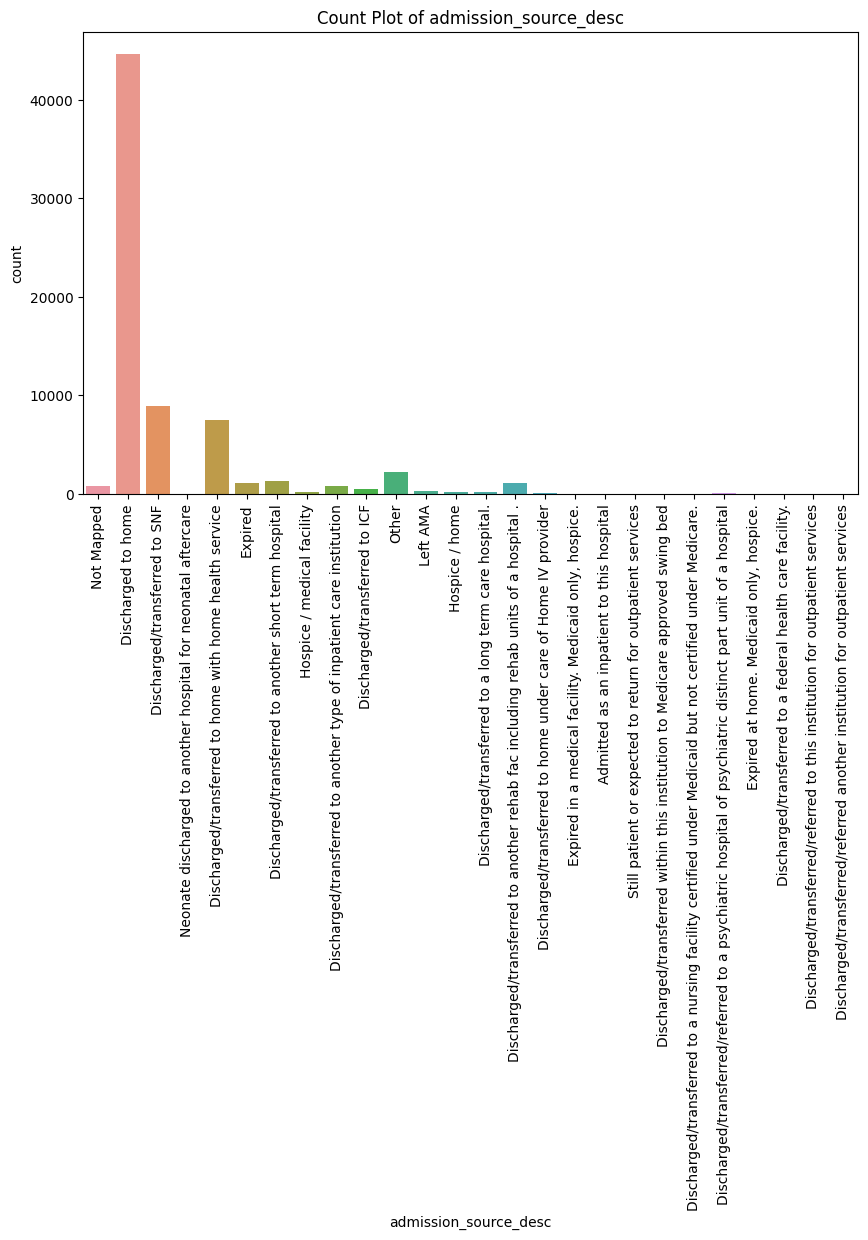

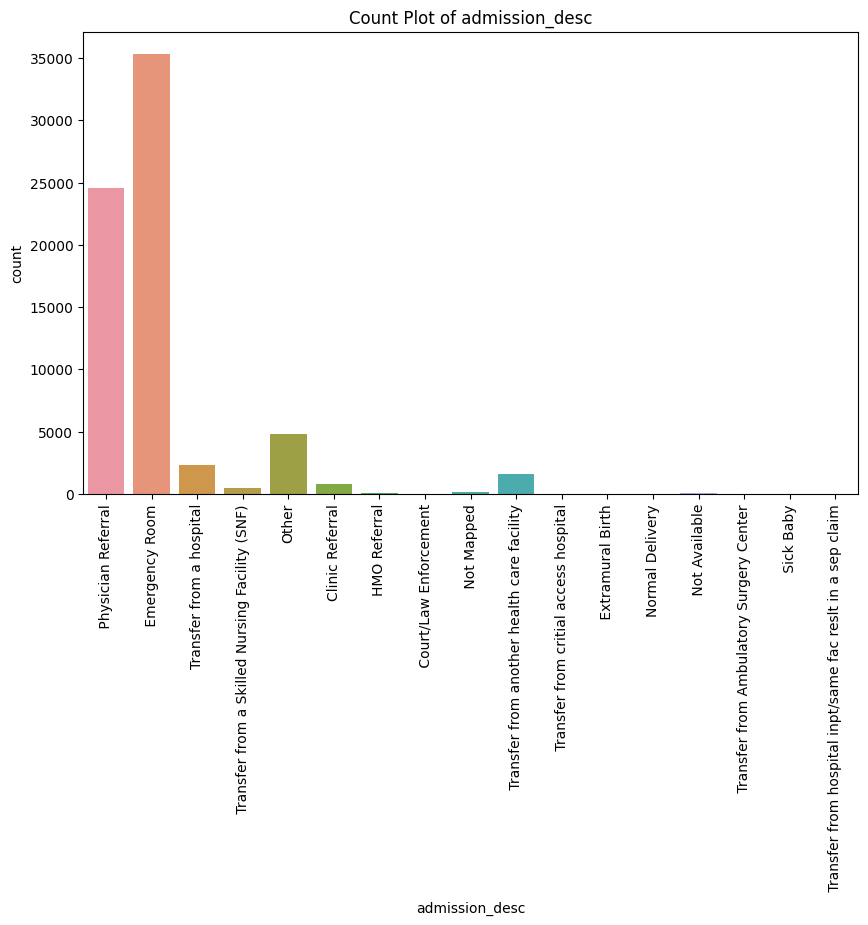

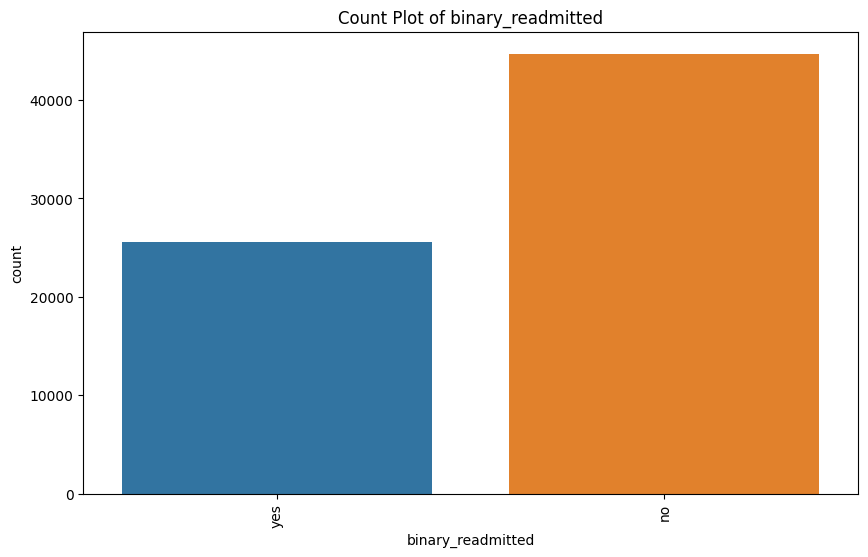

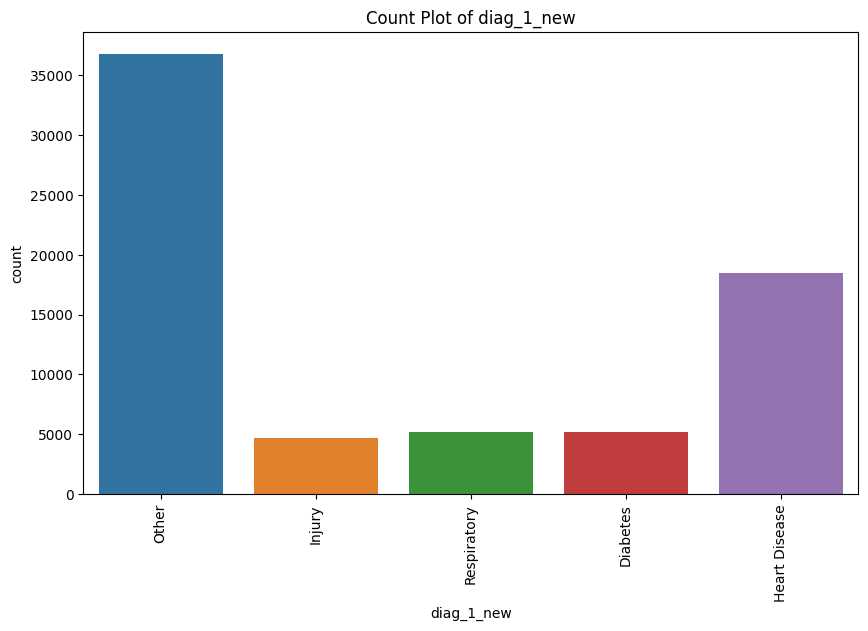

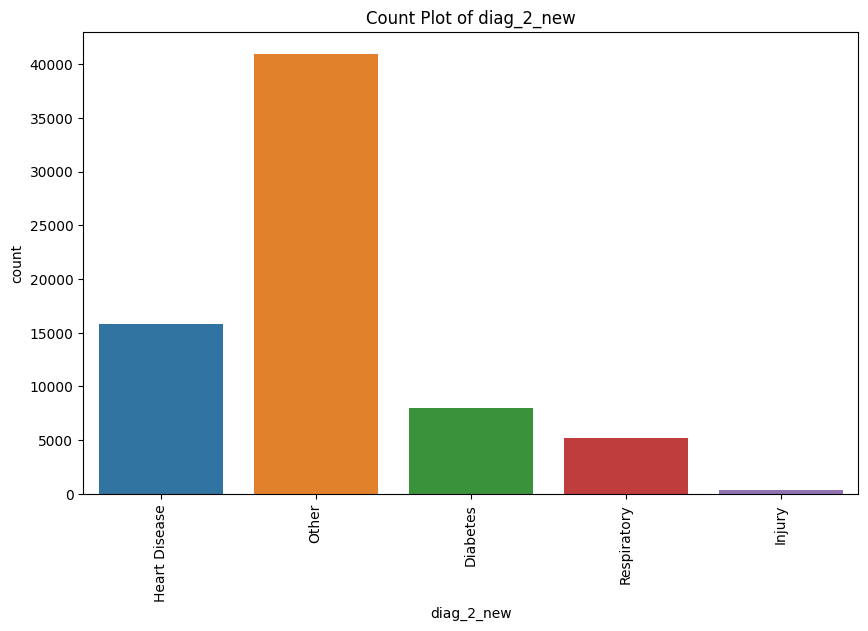

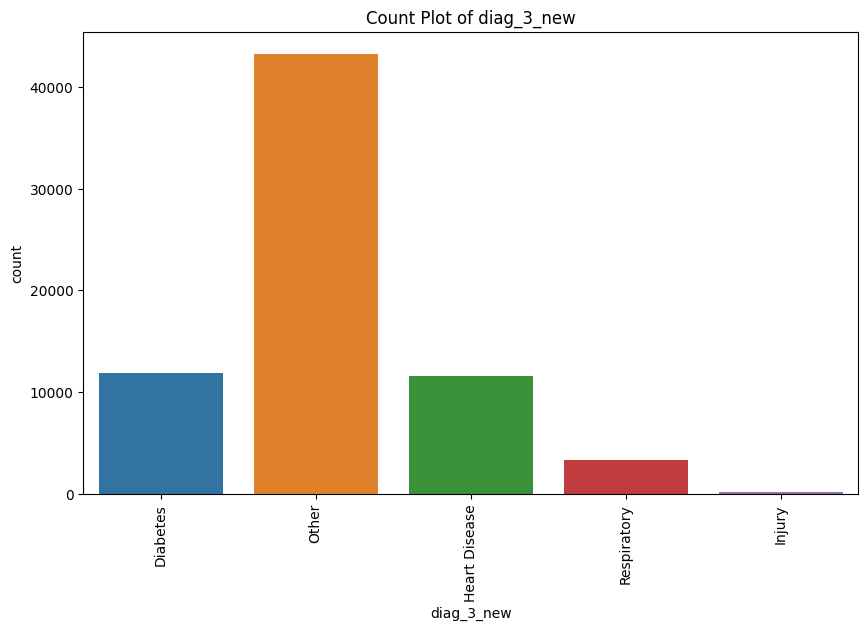

In [33]:
categorical_vars = df.select_dtypes(include=['object', 'category']).columns

# Create count plots for each categorical variable
for var in categorical_vars:
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    sns.countplot(x=var, data=df)
    plt.title(f'Count Plot of {var}')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.show()

# Data Statistics

In [34]:
# des. stat. - numeric only
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time_in_hospital,70256.0,4.307020,2.956366,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,70256.0,42.961085,19.914422,1.0,31.0,44.0,57.0,132.0
num_procedures,70256.0,1.444873,1.761094,0.0,0.0,1.0,2.0,6.0
num_medications,70256.0,15.850675,8.264550,1.0,10.0,14.0,20.0,81.0
number_outpatient,70256.0,0.301668,1.117115,0.0,0.0,0.0,0.0,38.0
number_emergency,70256.0,0.116816,0.619245,0.0,0.0,0.0,0.0,76.0
number_inpatient,70256.0,0.274909,0.745316,0.0,0.0,0.0,0.0,15.0
number_diagnoses,70256.0,7.346462,1.887392,3.0,6.0,8.0,9.0,16.0


## Boxplot of Int Features

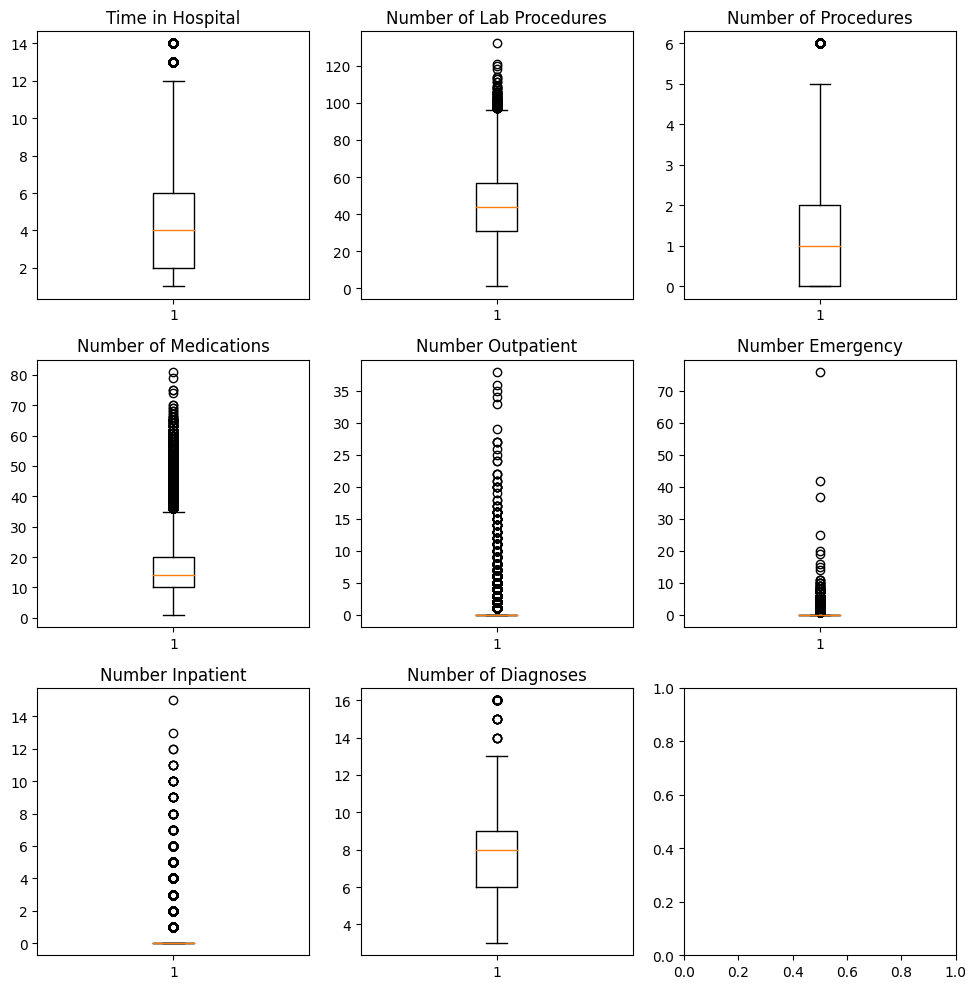

In [35]:
fig, axes = plt.subplots(nrows=3,ncols=3,figsize = (10,10))

axes[0,0].boxplot(df['time_in_hospital'])
axes[0,0].set_title('Time in Hospital')

axes[0,1].boxplot(df['num_lab_procedures'])
axes[0,1].set_title('Number of Lab Procedures')

axes[0,2].boxplot(df['num_procedures'])
axes[0,2].set_title('Number of Procedures')

axes[1,0].boxplot(df['num_medications'])
axes[1,0].set_title('Number of Medications')

axes[1,1].boxplot(df['number_outpatient'])
axes[1,1].set_title('Number Outpatient')

axes[1,2].boxplot(df['number_emergency'])
axes[1,2].set_title('Number Emergency')

axes[2,0].boxplot(df['number_inpatient'])
axes[2,0].set_title('Number Inpatient')

axes[2,1].boxplot(df['number_diagnoses'])
axes[2,1].set_title('Number of Diagnoses')
plt.tight_layout()


## Histogram of Int Features

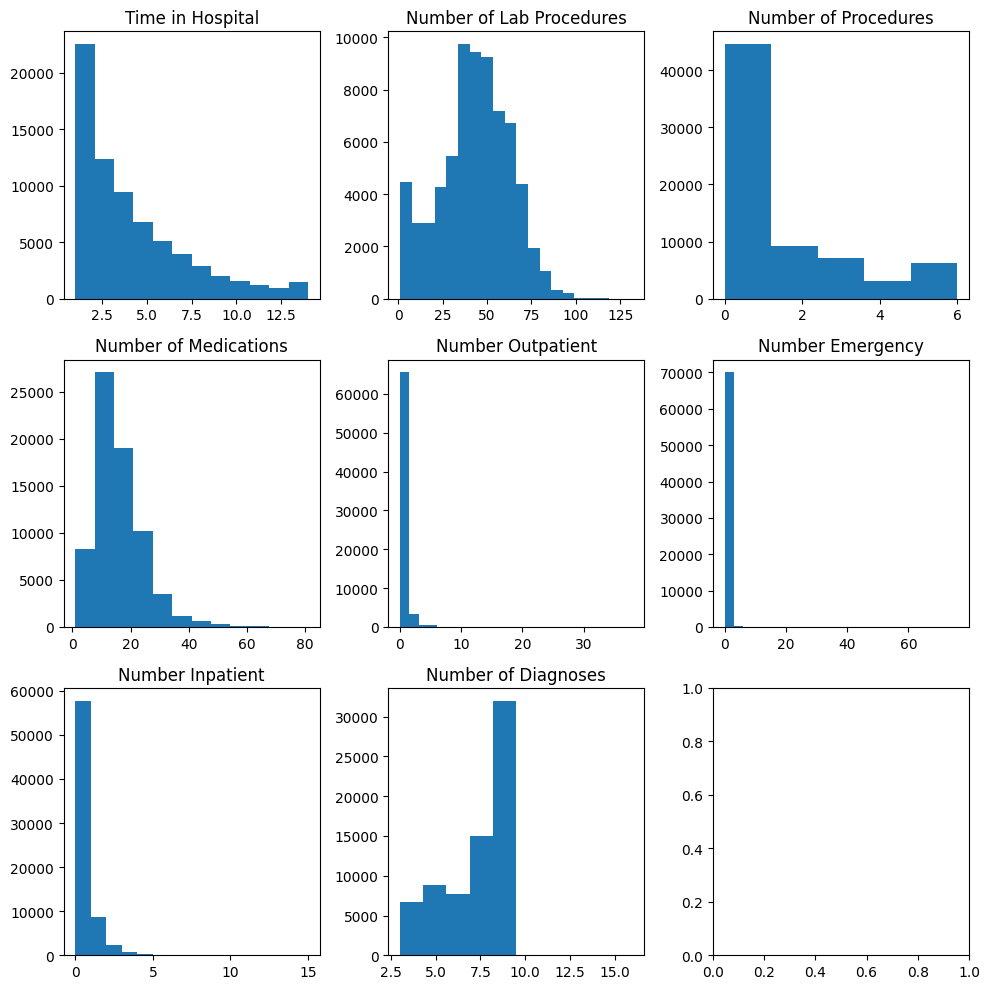

In [36]:
fig, axes = plt.subplots(nrows=3,ncols=3,figsize = (10,10))

axes[0,0].hist(df['time_in_hospital'], bins = 12)
axes[0,0].set_title('Time in Hospital')

axes[0,1].hist(df['num_lab_procedures'], bins = 20)
axes[0,1].set_title('Number of Lab Procedures')

axes[0,2].hist(df['num_procedures'], bins = 5)
axes[0,2].set_title('Number of Procedures')

axes[1,0].hist(df['num_medications'], bins = 12)
axes[1,0].set_title('Number of Medications')

axes[1,1].hist(df['number_outpatient'], bins = 25)
axes[1,1].set_title('Number Outpatient')

axes[1,2].hist(df['number_emergency'], bins = 25)
axes[1,2].set_title('Number Emergency')

axes[2,0].hist(df['number_inpatient'], bins = 15)
axes[2,0].set_title('Number Inpatient')

axes[2,1].hist(df['number_diagnoses'], bins = 10)
axes[2,1].set_title('Number of Diagnoses')

plt.tight_layout()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70256 entries, 1 to 101762
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   race                   70256 non-null  object
 1   gender                 70256 non-null  object
 2   age                    70256 non-null  object
 3   time_in_hospital       70256 non-null  int64 
 4   payer_code             70256 non-null  object
 5   medical_specialty      70256 non-null  object
 6   num_lab_procedures     70256 non-null  int64 
 7   num_procedures         70256 non-null  int64 
 8   num_medications        70256 non-null  int64 
 9   number_outpatient      70256 non-null  int64 
 10  number_emergency       70256 non-null  int64 
 11  number_inpatient       70256 non-null  int64 
 12  number_diagnoses       70256 non-null  int64 
 13  max_glu_serum          3395 non-null   object
 14  A1Cresult              12357 non-null  object
 15  metformin              

<hr>

# Dummy and Scaling

<hr>

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df['binary_readmitted'] = df['binary_readmitted'].map({'no':0,'yes':1})

X = df.drop(['binary_readmitted'], axis = 1)
y = df['binary_readmitted']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = .8, random_state=12)

object_columns= X_train.select_dtypes(include = 'object')
X_train_encoded = pd.get_dummies(X_train, columns= object_columns.columns, drop_first = True)
X_test_encoded = pd.get_dummies(X_test, columns = object_columns.columns, drop_first = True)

int_columns = X_train_encoded.select_dtypes(include = 'int')
scaler = StandardScaler()
X_train_encoded[int_columns.columns] = scaler.fit_transform(X_train_encoded[int_columns.columns])
X_test_encoded[int_columns.columns] = scaler.transform(X_test_encoded[int_columns.columns])

# Logit Model

In [39]:
# import statsmodels.api as sm
# from sklearn.metrics import accuracy_score

# X_train_encoded_with_const = sm.add_constant(X_train_encoded)

# logit_model = sm.Logit(y_train, X_train_encoded_with_const)

# logit_result = logit_model.fit()

# X_test_encoded_with_const = sm.add_constant(X_test_encoded)
# y_pred = logit_result.predict(X_test_encoded_with_const)

# threshold = .5
# y_pred_binary = (y_pred > threshold).astype(int)

# accuracy = accuracy_score(y_test, y_pred_binary)
# print('Accuracy', accuracy)
# print(logit_result.summary())